#**Data Preparation**

**Identify problems or characters in the data**

**1.**  **Data Quality**
*   Format
*   Duplicate
*   Missing Values


**2.** **Data Quantity**

*   Number of Samples
*   Number of Features - Total New Cases
*   New Cases Per Day
*   Recovery Cases
*   Death Cases

## **Import Library**

In [1]:
# Pandas --> It helps manipulate data
import pandas as pd

# Numpy --> It helps with calculations
import numpy as np

# Matplotlib --> It helps create visualizations
import matplotlib.pyplot as plt

## **Import Data**

In [2]:
# Change the Github link to download directly
data = "https://raw.githubusercontent.com/Dafebecca/COVID-19-BANDUNG/main/COVID-19.csv"

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(data)

# Display the DataFrame
display(df)

,Tanggal,Terinfeksi,Sembuh,Meninggal,Total Kasus
0,2/2/2021,1478.0,7756.0,194.0,9428.0
1,2/3/2021,1351.0,8024.0,197.0,9572.0
2,2/4/2021,1103.0,8452.0,202.0,9757.0
3,2/5/2021,NaN,NaN,NaN,NaN
4,2/6/2021,1227.0,8591.0,203.0,10021.0
...,...,...,...,...,...
864,6/16/2023,51.0,104608.0,1489.0,106148.0
865,6/17/2023,NaN,NaN,NaN,NaN
866,6/18/2023,41.0,104619.0,1489.0,106149.0
867,6/19/2023,32.0,104632.0,1489.0,106153.0


## **Data Info**

In [3]:
# Looking at the shape --> There are 869 rows and 5 columns
df.shape

(869, 5)

In [4]:
# Viewing Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tanggal      869 non-null    object 
 1   Terinfeksi   637 non-null    float64
 2   Sembuh       637 non-null    float64
 3   Meninggal    637 non-null    float64
 4   Total Kasus  637 non-null    float64
dtypes: float64(4), object(1)
memory usage: 34.1+ KB


In [5]:
# Data Describe
df.describe()

,Terinfeksi,Sembuh,Meninggal,Total Kasus
count,637.000000,637.000000,637.000000,637.000000
mean,1256.990581,63180.103611,1229.007849,65666.318681
std,2268.491830,33407.499940,454.123305,33284.977482
min,14.000000,7756.000000,194.000000,9428.000000
25%,108.000000,37981.000000,1391.000000,41455.000000
50%,507.000000,80694.000000,1472.000000,84487.000000
75%,1071.000000,94229.000000,1484.000000,96083.000000
max,12918.000000,104638.000000,1489.000000,106156.000000


## **Format**

In [6]:
# Change the data type for the infected, removed, died, and total cases columns to numeric
df["Terinfeksi"] = pd.to_numeric(df["Terinfeksi"], errors="coerce")
df["Sembuh"] = pd.to_numeric(df["Sembuh"], errors= "coerce")
df["Meninggal"] = pd.to_numeric(df["Meninggal"], errors="coerce")
df["Total Kasus"] = pd.to_numeric(df["Total Kasus"], errors="coerce")

# Convert the "Date" column to datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

# Set the "Date" column as DateTimeIndex
df = df.set_index("Tanggal")
print(df.head())

            Terinfeksi  Sembuh  Meninggal  Total Kasus
Tanggal                                               
2021-02-02      1478.0  7756.0      194.0       9428.0
2021-02-03      1351.0  8024.0      197.0       9572.0
2021-02-04      1103.0  8452.0      202.0       9757.0
2021-02-05         NaN     NaN        NaN          NaN
2021-02-06      1227.0  8591.0      203.0      10021.0


In [7]:
# Viewing info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 869 entries, 2021-02-02 to 2023-06-20
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Terinfeksi   637 non-null    float64
 1   Sembuh       637 non-null    float64
 2   Meninggal    637 non-null    float64
 3   Total Kasus  637 non-null    float64
dtypes: float64(4)
memory usage: 33.9 KB


## **Visualization Data Before Handling Missing Values**

### **Infected**

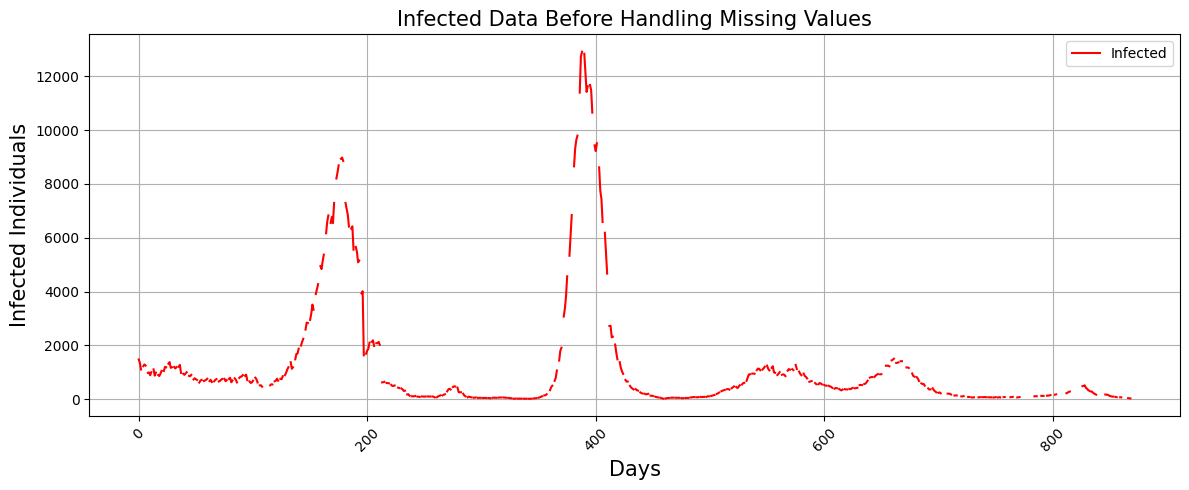

In [8]:
days = np.arange(0,len(df["Terinfeksi"])).tolist()
df["Day"] = days

# Create a line plot
plt.figure(figsize=(12, 5))
plt.plot(df["Day"], df["Terinfeksi"], label="Infected", color="red")

# Adding titles and labels
plt.title("Infected Data Before Handling Missing Values", fontsize = "15")
plt.xlabel("Days", fontsize = "15")
plt.ylabel("Infected Individuals", fontsize = "15")
plt.legend()

# Improve formatting
plt.xticks(rotation=45)
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
# plt.savefig("Infected - Before Handling Missing Values.png", dpi=300, bbox_inches="tight")
plt.show()

### **Removed**

In [9]:
# Added "Removed" column
df["Removed"] = df["Sembuh"] + df["Meninggal"]

# Display the DataFrame
display(df)

,Terinfeksi,Sembuh,Meninggal,Total Kasus,Day,Removed
Tanggal,,,,,,
2021-02-02,1478.0,7756.0,194.0,9428.0,0,7950.0
2021-02-03,1351.0,8024.0,197.0,9572.0,1,8221.0
2021-02-04,1103.0,8452.0,202.0,9757.0,2,8654.0
2021-02-05,NaN,NaN,NaN,NaN,3,NaN
2021-02-06,1227.0,8591.0,203.0,10021.0,4,8794.0
...,...,...,...,...,...,...
2023-06-16,51.0,104608.0,1489.0,106148.0,864,106097.0
2023-06-17,NaN,NaN,NaN,NaN,865,NaN
2023-06-18,41.0,104619.0,1489.0,106149.0,866,106108.0


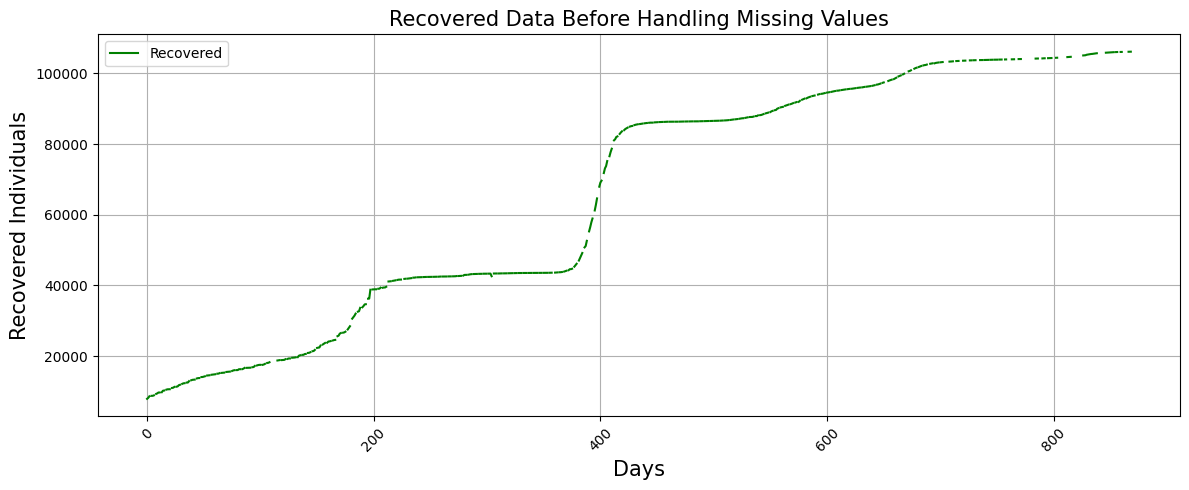

In [10]:
days = np.arange(0,len(df["Removed"])).tolist()
df["Day"] = days

# Create a line plot
plt.figure(figsize=(12, 5))
plt.plot(df["Day"], df["Removed"], label="Recovered", color="green")

# Adding titles and labels
plt.title("Recovered Data Before Handling Missing Values", fontsize="15")
plt.xlabel("Days", fontsize="15")
plt.ylabel("Recovered Individuals", fontsize="15")
plt.legend()

# Improve formatting
plt.xticks(rotation=45)
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
# plt.savefig("Recovered - Before Handling Missing Values.png", dpi=300, bbox_inches="tight")
plt.show()

###**Susceptible**

In [11]:
# Initial Population
N = 2500000

# Added "Susceptible" column
df["Susceptible"] = N - df["Terinfeksi"] - df["Removed"]

# Display the DataFrame
display(df)

,Terinfeksi,Sembuh,Meninggal,Total Kasus,Day,Removed,Susceptible
Tanggal,,,,,,,
2021-02-02,1478.0,7756.0,194.0,9428.0,0,7950.0,2490572.0
2021-02-03,1351.0,8024.0,197.0,9572.0,1,8221.0,2490428.0
2021-02-04,1103.0,8452.0,202.0,9757.0,2,8654.0,2490243.0
2021-02-05,NaN,NaN,NaN,NaN,3,NaN,NaN
2021-02-06,1227.0,8591.0,203.0,10021.0,4,8794.0,2489979.0
...,...,...,...,...,...,...,...
2023-06-16,51.0,104608.0,1489.0,106148.0,864,106097.0,2393852.0
2023-06-17,NaN,NaN,NaN,NaN,865,NaN,NaN
2023-06-18,41.0,104619.0,1489.0,106149.0,866,106108.0,2393851.0


In [12]:
# Change the data type for the infected, removed, died, and total cases columns to numeric
df["Susceptible"] = pd.to_numeric(df["Susceptible"], errors="coerce")

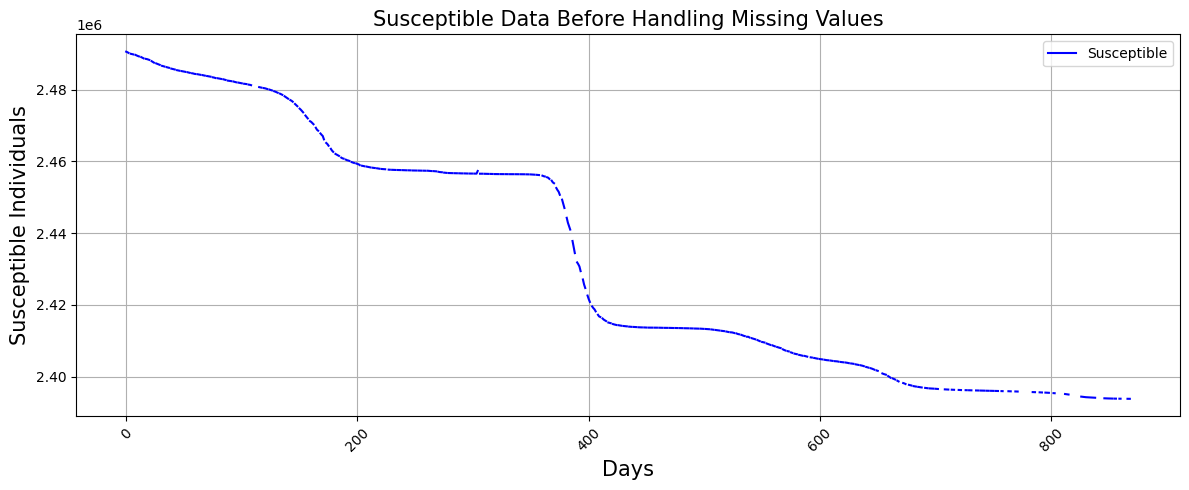

In [13]:
days = np.arange(0,len(df["Susceptible"])).tolist()
df["Day"] = days

# Create a line plot
plt.figure(figsize=(12, 5))
plt.plot(df["Day"], df["Susceptible"], label="Susceptible", color="blue")

# Adding titles and labels
plt.title("Susceptible Data Before Handling Missing Values",  fontsize="15")
plt.xlabel("Days", fontsize="15")
plt.ylabel("Susceptible Individuals",  fontsize="15")
plt.legend()

# Improve formatting
plt.xticks(rotation=45)
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
# plt.savefig("Susceptible - Before Handling Missing Values.png", dpi=300, bbox_inches="tight")
plt.show()

## **Missing Values**

In [14]:
# Checking for missing values --> There were 232 missing arrivals in the columns (infected, recovered, died, total cases)
print("Total Missing Values : ")
df.isnull().sum()

Total Missing Values : 


,0
Terinfeksi,232
Sembuh,232
Meninggal,232
Total Kasus,232
Day,0
Removed,232
Susceptible,232


In [15]:
# Langkah 2: Hitung total nilai yang hilang untuk setiap kolom
missing_values_count = df.isnull().sum()

# Langkah 3: Hitung total nilai dalam setiap kolom
total_values = df.shape[0]

# Langkah 4: Hitung persentase nilai yang hilang
missing_percentage = (missing_values_count / total_values) * 100

# Langkah 5: Tampilkan hasil
print("Persentase Nilai yang Hilang di Setiap Kolom:")
print(missing_percentage)

Persentase Nilai yang Hilang di Setiap Kolom:
Terinfeksi     26.697353
Sembuh         26.697353
Meninggal      26.697353
Total Kasus    26.697353
Day             0.000000
Removed        26.697353
Susceptible    26.697353
dtype: float64


## **Handling Missing Values**

There are several ways of imputation to deal with missing values

*   Mean
*   Median
*   Interpolation
*   Time Series Interpolation
*   LOCF (Last Observation Carried Forward)

**Function**

In [16]:
# Mean & Median
def impute_mean_median(dataframe, method="mean"):
    if method == "median":
        return dataframe.fillna(dataframe.median())
    return dataframe.fillna(dataframe.mean())

# LOCF (Last Observation Carried Forward)
def impute_locf(dataframe):
    return dataframe.fillna(method="ffill")

# Linear Interpolation
def impute_linear_interpolation(dataframe):
    return dataframe.interpolate(method="linear")

# Time Series Interpolation
def impute_time_series_interpolation(dataframe, method="time"):
    return dataframe.interpolate(method=method)

**Mean**

In [17]:
# Call the mean function
df_mean = impute_mean_median(df, method="mean")
df_mean

,Terinfeksi,Sembuh,Meninggal,Total Kasus,Day,Removed,Susceptible
Tanggal,,,,,,,
2021-02-02,1478.000000,7756.000000,194.000000,9428.000000,0,7950.00000,2.490572e+06
2021-02-03,1351.000000,8024.000000,197.000000,9572.000000,1,8221.00000,2.490428e+06
2021-02-04,1103.000000,8452.000000,202.000000,9757.000000,2,8654.00000,2.490243e+06
2021-02-05,1256.990581,63180.103611,1229.007849,65666.318681,3,64409.11146,2.434334e+06
2021-02-06,1227.000000,8591.000000,203.000000,10021.000000,4,8794.00000,2.489979e+06
...,...,...,...,...,...,...,...
2023-06-16,51.000000,104608.000000,1489.000000,106148.000000,864,106097.00000,2.393852e+06
2023-06-17,1256.990581,63180.103611,1229.007849,65666.318681,865,64409.11146,2.434334e+06
2023-06-18,41.000000,104619.000000,1489.000000,106149.000000,866,106108.00000,2.393851e+06


**Median**

In [18]:
# Call the median function
df_median = impute_mean_median(df, method="median")
df_median

,Terinfeksi,Sembuh,Meninggal,Total Kasus,Day,Removed,Susceptible
Tanggal,,,,,,,
2021-02-02,1478.0,7756.0,194.0,9428.0,0,7950.0,2490572.0
2021-02-03,1351.0,8024.0,197.0,9572.0,1,8221.0,2490428.0
2021-02-04,1103.0,8452.0,202.0,9757.0,2,8654.0,2490243.0
2021-02-05,507.0,80694.0,1472.0,84487.0,3,82166.0,2415513.0
2021-02-06,1227.0,8591.0,203.0,10021.0,4,8794.0,2489979.0
...,...,...,...,...,...,...,...
2023-06-16,51.0,104608.0,1489.0,106148.0,864,106097.0,2393852.0
2023-06-17,507.0,80694.0,1472.0,84487.0,865,82166.0,2415513.0
2023-06-18,41.0,104619.0,1489.0,106149.0,866,106108.0,2393851.0


**LOCF**

In [19]:
# Call the locf function
df_locf = impute_locf(df)
df_locf

<ipython-input-16-b55ff106b24c>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return dataframe.fillna(method="ffill")


,Terinfeksi,Sembuh,Meninggal,Total Kasus,Day,Removed,Susceptible
Tanggal,,,,,,,
2021-02-02,1478.0,7756.0,194.0,9428.0,0,7950.0,2490572.0
2021-02-03,1351.0,8024.0,197.0,9572.0,1,8221.0,2490428.0
2021-02-04,1103.0,8452.0,202.0,9757.0,2,8654.0,2490243.0
2021-02-05,1103.0,8452.0,202.0,9757.0,3,8654.0,2490243.0
2021-02-06,1227.0,8591.0,203.0,10021.0,4,8794.0,2489979.0
...,...,...,...,...,...,...,...
2023-06-16,51.0,104608.0,1489.0,106148.0,864,106097.0,2393852.0
2023-06-17,51.0,104608.0,1489.0,106148.0,865,106097.0,2393852.0
2023-06-18,41.0,104619.0,1489.0,106149.0,866,106108.0,2393851.0


**Linear Interpolation**

In [20]:
# Call the interpolation function
df_interpolation = impute_linear_interpolation(df)
df_interpolation

,Terinfeksi,Sembuh,Meninggal,Total Kasus,Day,Removed,Susceptible
Tanggal,,,,,,,
2021-02-02,1478.0,7756.0,194.0,9428.0,0,7950.0,2490572.0
2021-02-03,1351.0,8024.0,197.0,9572.0,1,8221.0,2490428.0
2021-02-04,1103.0,8452.0,202.0,9757.0,2,8654.0,2490243.0
2021-02-05,1165.0,8521.5,202.5,9889.0,3,8724.0,2490111.0
2021-02-06,1227.0,8591.0,203.0,10021.0,4,8794.0,2489979.0
...,...,...,...,...,...,...,...
2023-06-16,51.0,104608.0,1489.0,106148.0,864,106097.0,2393852.0
2023-06-17,46.0,104613.5,1489.0,106148.5,865,106102.5,2393851.5
2023-06-18,41.0,104619.0,1489.0,106149.0,866,106108.0,2393851.0


**Time Series Interpolation**

In [21]:
# Call the time series interpolation function
df_ts_int =impute_time_series_interpolation(df)
df_ts_int

,Terinfeksi,Sembuh,Meninggal,Total Kasus,Day,Removed,Susceptible
Tanggal,,,,,,,
2021-02-02,1478.0,7756.0,194.0,9428.0,0,7950.0,2490572.0
2021-02-03,1351.0,8024.0,197.0,9572.0,1,8221.0,2490428.0
2021-02-04,1103.0,8452.0,202.0,9757.0,2,8654.0,2490243.0
2021-02-05,1165.0,8521.5,202.5,9889.0,3,8724.0,2490111.0
2021-02-06,1227.0,8591.0,203.0,10021.0,4,8794.0,2489979.0
...,...,...,...,...,...,...,...
2023-06-16,51.0,104608.0,1489.0,106148.0,864,106097.0,2393852.0
2023-06-17,46.0,104613.5,1489.0,106148.5,865,106102.5,2393851.5
2023-06-18,41.0,104619.0,1489.0,106149.0,866,106108.0,2393851.0


### **Infected**

**Infected Data Visualization (Mean & Median)**

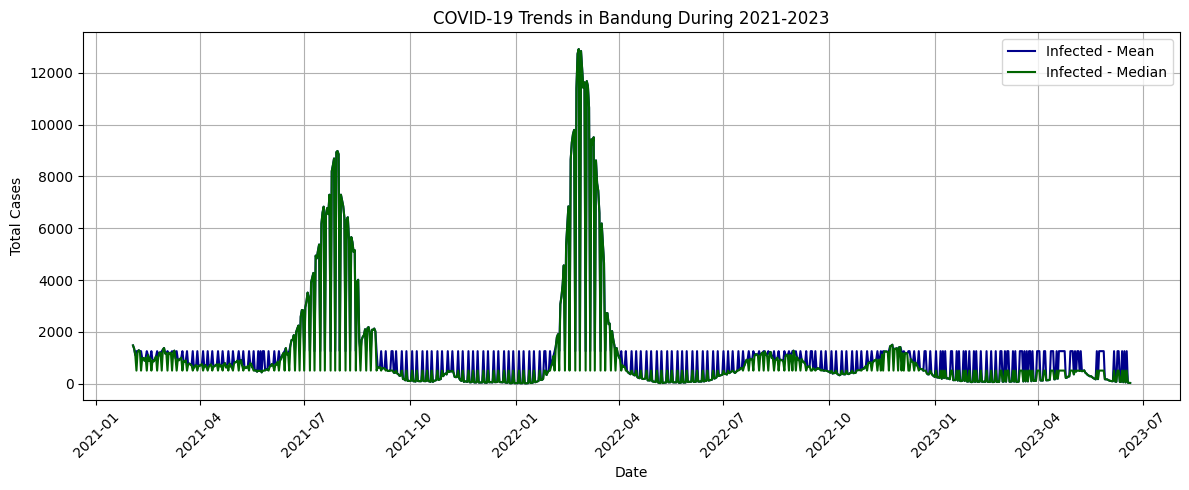

In [22]:
# Create a line plot
plt.figure(figsize=(12, 5))
plt.plot(df_mean.index, df_mean["Terinfeksi"], label= "Infected - Mean", color="darkblue")
plt.plot(df_median.index, df_median["Terinfeksi"], label="Infected - Median", color="darkgreen")

# Adding titles and labels
plt.title("COVID-19 Trends in Bandung During 2021-2023")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()

# Improve formatting
plt.xticks(rotation=45)
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
plt.show()

**Infected Data Visualization (LOCF, Linear Interpolation, TS Interpolation)**

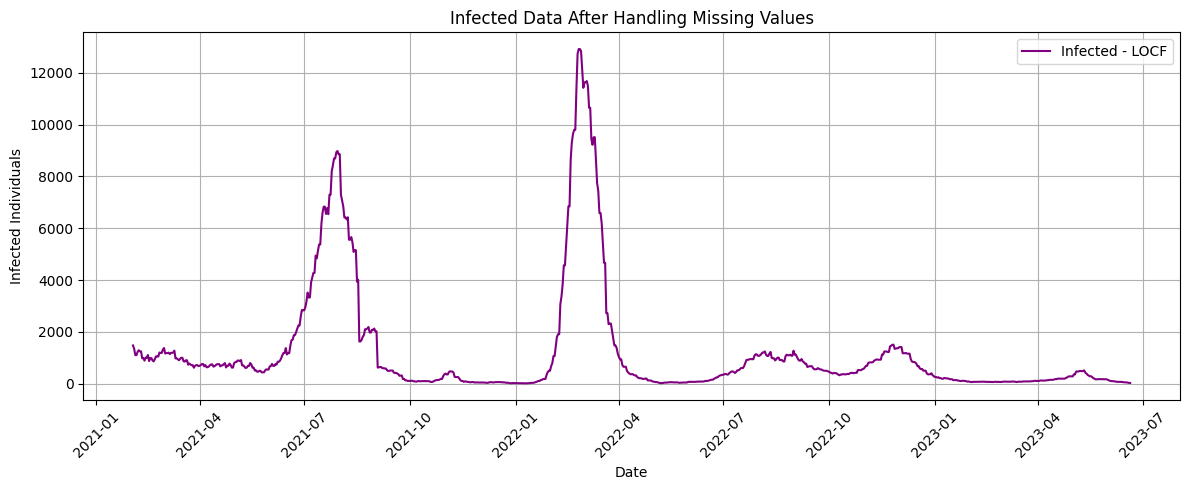

In [23]:
# Create a line plot
plt.figure(figsize=(12, 5))
plt.plot(df_locf.index, df_locf["Terinfeksi"], label="Infected - LOCF", color="purple")
#plt.plot(df_interpolation.index, df_interpolation["Terinfeksi"], label="Infected - Linear Interpolation", color="darkblue")
#plt.plot(df_ts_int.index, df_ts_int["Terinfeksi"], label="Infected - Time Series Interpolation", color="red")

# Adding titles and labels
plt.title("Infected Data After Handling Missing Values")
plt.xlabel("Date")
plt.ylabel("Infected Individuals")
plt.legend()

# Improve formatting
plt.xticks(rotation=45)
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
plt.savefig("Infected-After.png", dpi=300, bbox_inches="tight")
plt.show()

### **Recovered**

**Recovered Data Visualization (Mean & Median)**

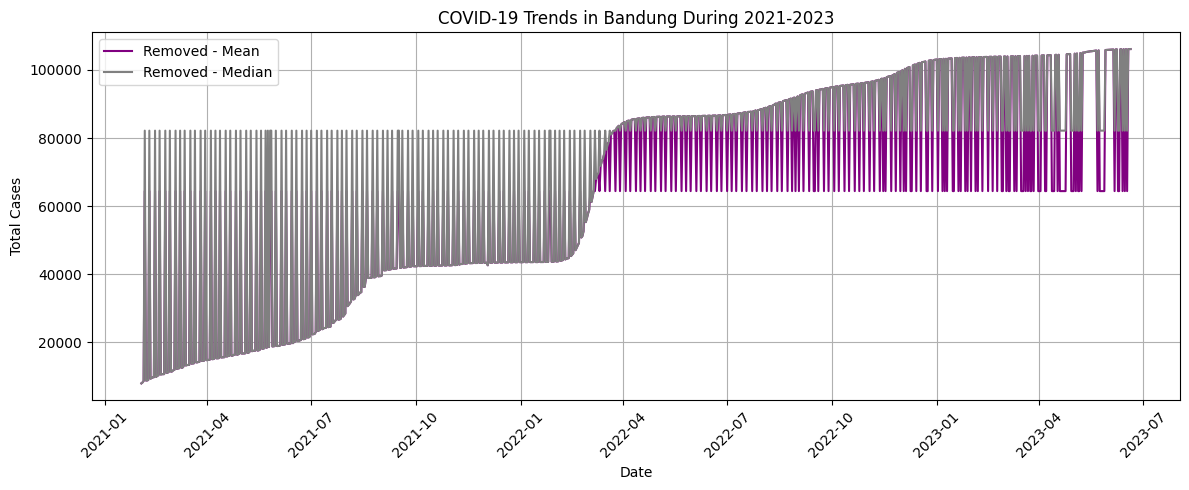

In [24]:
# Create a line plot
plt.figure(figsize=(12, 5))
plt.plot(df_mean.index, df_mean["Removed"], label= "Removed - Mean", color="purple")
plt.plot(df_median.index, df_median["Removed"], label="Removed - Median", color="gray")

# Adding titles and labels
plt.title("COVID-19 Trends in Bandung During 2021-2023")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()

# Improve formatting
plt.xticks(rotation=45)
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
plt.show()

**Recovered Data Visualization (LOCF, Linear Interpolation, TS Interpolation)**

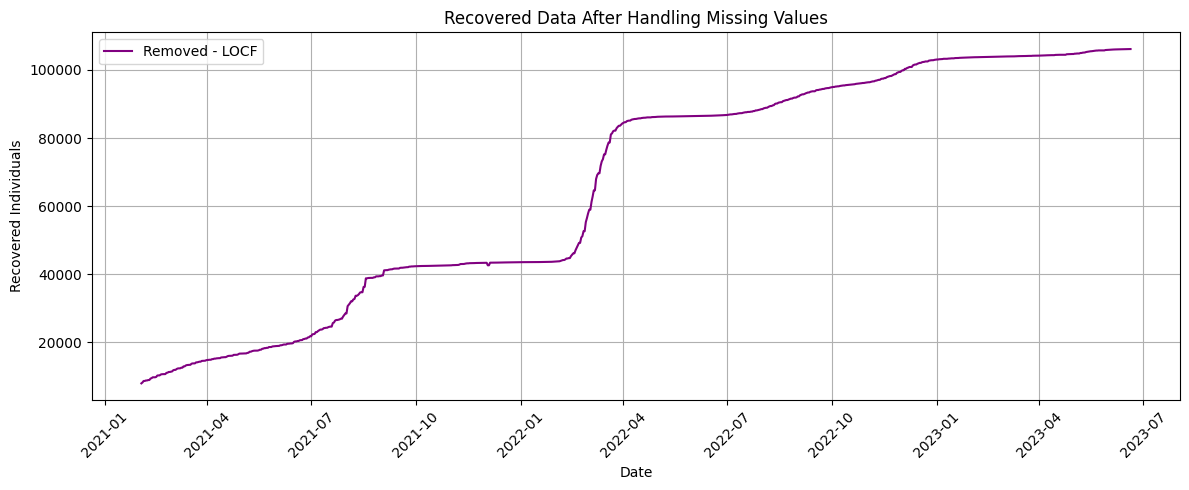

In [25]:
# Create a line plot
plt.figure(figsize=(12, 5))
plt.plot(df_locf.index, df_locf["Removed"], label="Removed - LOCF", color="purple")
#plt.plot(df_interpolation.index, df_interpolation["Removed"], label="Removed - Linear Interpolation", color="brown")
#plt.plot(df_ts_int.index, df_ts_int["Removed"], label="Removed - Time Series Interpolation", color="blue")

# Adding titles and labels
plt.title("Recovered Data After Handling Missing Values")
plt.xlabel("Date")
plt.ylabel("Recovered Individuals")
plt.legend()

# Improve formatting
plt.xticks(rotation=45)
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
plt.savefig("Recovered-After.png", dpi=300, bbox_inches="tight")
plt.show()

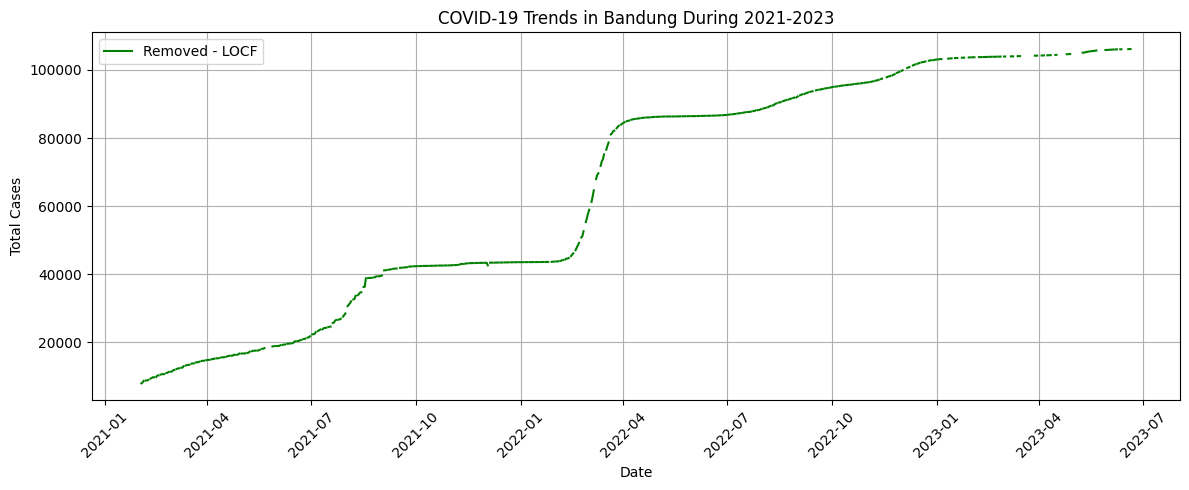

In [26]:
# Create a line plot
plt.figure(figsize=(12, 5))
plt.plot(df_locf.index, df["Removed"], label="Removed - LOCF", color="green")

# Adding titles and labels
plt.title("COVID-19 Trends in Bandung During 2021-2023")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()

# Improve formatting
plt.xticks(rotation=45)
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
plt.show()

### **Susceptible**

**Susceptible Data Visualization (Mean & Median)**

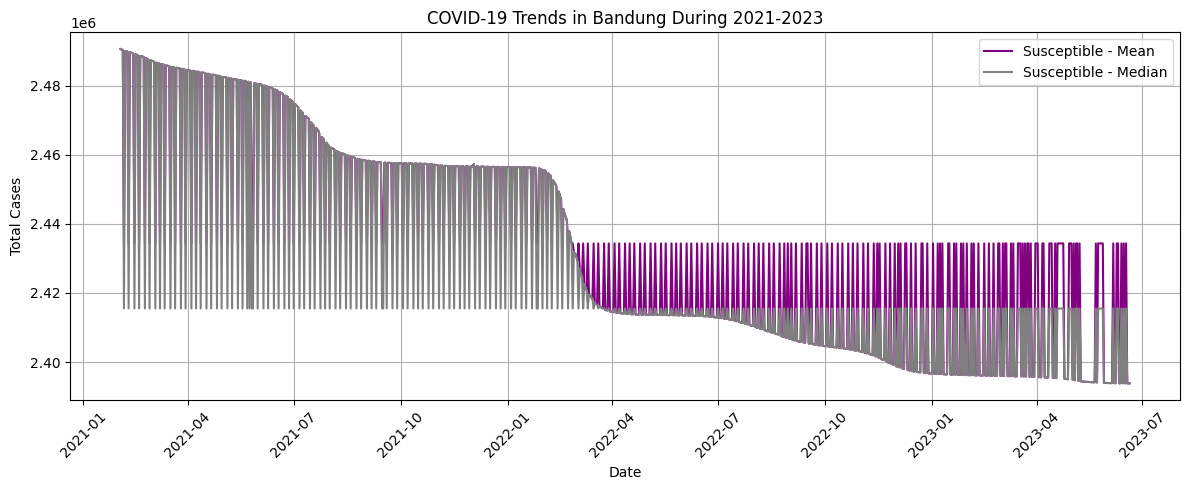

In [27]:
# Create a line plot
plt.figure(figsize=(12, 5))
plt.plot(df_mean.index, df_mean["Susceptible"], label= "Susceptible - Mean", color="purple")
plt.plot(df_median.index, df_median["Susceptible"], label="Susceptible - Median", color="gray")

# Adding titles and labels
plt.title("COVID-19 Trends in Bandung During 2021-2023")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()

# Improve formatting
plt.xticks(rotation=45)
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
plt.show()

**Susceptible Data Visualization (LOCF, Linear Interpolation, TS Interpolation)**

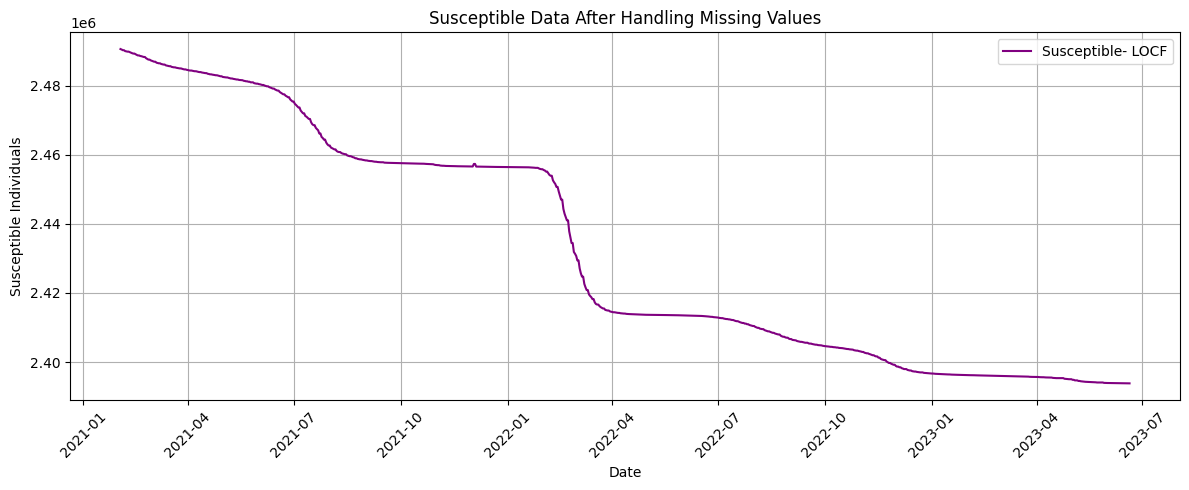

In [28]:
# Create a line plot
plt.figure(figsize=(12, 5))
plt.plot(df_locf.index, df_locf["Susceptible"], label="Susceptible- LOCF", color="purple")
#plt.plot(df_interpolation.index, df_interpolation["Removed"], label="Susceptible - Linear Interpolation", color="brown")
#plt.plot(df_ts_int.index, df_ts_int["Susceptible"], label="Susceptible - Time Series Interpolation", color="blue")

# Adding titles and labels
plt.title("Susceptible Data After Handling Missing Values")
plt.xlabel("Date")
plt.ylabel("Susceptible Individuals")
plt.legend()

# Improve formatting
plt.xticks(rotation=45)
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
plt.savefig("Susceptible-After.png", dpi=300, bbox_inches="tight")
plt.show()